# Topic modelling BTM elbow method
This has not been converted to a script yet.

TODO: need to update input file with the most up-to-date ElbowMethodData (available on our drive - basically a string version of the log, topics, and loglik values)

Get optimal number of topics based on BTM logLik value output.

[Kmeans clustering in Python](https://realpython.com/k-means-clustering-python/)

[Knee library (elbow method) documentation](https://kneed.readthedocs.io/en/stable/parameters.html#curve)

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator # elbow method
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d # normalise curve

In [2]:
df = pd.read_csv('../datain/topic_modelling/ElbowMethodData.csv')
df

,Log,Topics,LogLik
0,8.276746,1,-189123517
1,8.258063,2,-181160177
2,8.244208,3,-175471871
3,8.238415,4,-173147202
4,8.231924,5,-170578552
...,...,...,...
58,8.204598,80,-160176335
59,8.203796,85,-159880554
60,8.203124,90,-159633508
61,8.203796,95,-159880554


In [3]:
topics = df[['Topics']].to_numpy()
topics

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100]])

In [4]:
loglikvals = df[['LogLik']].to_numpy()
loglikvals

array([[-189123517],
       [-181160177],
       [-175471871],
       [-173147202],
       [-170578552],
       [-169370878],
       [-168354008],
       [-167519089],
       [-167735262],
       [-166471854],
       [-166022211],
       [-165496610],
       [-165269809],
       [-164697669],
       [-164346746],
       [-164214998],
       [-164113393],
       [-163734366],
       [-163534564],
       [-163485742],
       [-163529923],
       [-163036367],
       [-163381837],
       [-162660606],
       [-162612370],
       [-162772607],
       [-162204660],
       [-162405769],
       [-162336646],
       [-162053387],
       [-161924229],
       [-161992518],
       [-161762292],
       [-161802569],
       [-161567580],
       [-161404961],
       [-161533272],
       [-161367473],
       [-161300059],
       [-161241164],
       [-161413198],
       [-161025984],
       [-161134165],
       [-161086509],
       [-160921866],
       [-160858573],
       [-161027380],
       [-1610

In [5]:
x = np.concatenate(topics).ravel()
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100])

In [6]:
y = np.concatenate(loglikvals).ravel()
y

array([-189123517, -181160177, -175471871, -173147202, -170578552,
       -169370878, -168354008, -167519089, -167735262, -166471854,
       -166022211, -165496610, -165269809, -164697669, -164346746,
       -164214998, -164113393, -163734366, -163534564, -163485742,
       -163529923, -163036367, -163381837, -162660606, -162612370,
       -162772607, -162204660, -162405769, -162336646, -162053387,
       -161924229, -161992518, -161762292, -161802569, -161567580,
       -161404961, -161533272, -161367473, -161300059, -161241164,
       -161413198, -161025984, -161134165, -161086509, -160921866,
       -160858573, -161027380, -161049514, -160900740, -160826809,
       -160830971, -160654281, -160635914, -160536860, -160355864,
       -160258692, -160039599, -160171501, -160176335, -159880554,
       -159633508, -159880554, -159538560])

In [7]:
# kl = KneeLocator(x, y, curve="concave", direction="increasing")
# kl.plot_knee_normalized()

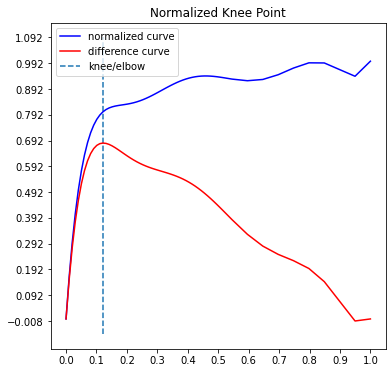

In [8]:
kl = KneeLocator(x, y, curve="concave", direction="increasing", interp_method="polynomial")
kl.plot_knee_normalized()

In [9]:
kl.elbow

13

In [10]:
kl.polynomial_degree

7